# **Comprehensive Healthcare Cost Analysis: NY State SPARCS 2022**
## **Objective**

The goal of this project is to analyze the NY State SPARCS 2022 dataset to uncover the primary drivers of healthcare costs and operational performance. By examining inpatient discharge data, I aim to identify patterns in hospital spending, clinical resource allocation, and length-of-stay efficiency.

### Environment Setup
* **Action**: Initialize the analytical environment using Pandas for high-performance data manipulation.

* **Visualization**: Leverage Matplotlib and Seaborn to create publication-quality visualizations that translate complex data into actionable insights.

* **Design**: A standardized whitegrid theme is applied to ensure visual consistency and high readability for stakeholders.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To maintain a professional aesthetic and ensure high readability for stakeholders, I have adopted the **whitegrid** theme
sns.set_theme(style = "whitegrid")

# --- REPRODUCIBILITY CHECK---
# Verify library versions ensures that the analysis can be replicated with consistent results in different environments
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.3
Seaborn version: 0.13.2


# Phase 1: Data Acquisition & Quality Check
### 1.1 Data Loading
* **Dataset Source**: The analysis uses the New York State Hospital Inpatient Discharges (SPARCS) 2022 dataset to examine statewide healthcare utilization and cost patterns.
  
* **Technical Note**: Applied **low_memory=False** to manage the large-scale file size efficiently, ensuring consistent data type inference and system stability during the ingestion process.

In [3]:
# Load the primary dataset
df = pd.read_csv("Hospital_Inpatient_Discharges_(SPARCS_De-Identified)__2022_20251103.csv", low_memory = False)

# Quick confirmation of records loaded
print(f"Total records loaded: {len(df):,}")

Total records loaded: 2,103,433


### 1.2 Quality Audit
* **Integrity Check**: Perform a comprehensive audit to identify missing values **NaN (Not a Number)** across all features.
  
* **Reliability**: This step is crucial because missing data can lead to biased averages and incorrect totals. By identifying gaps early, I ensure that the final financial reports and clinical insights are accurate and trustworthy.

In [4]:
# --- DATA INTEGRITY CHECK ---
# Identify missing values to ensure the dataset is reliable for analysis
print("Missing values per column (Top 10 columns):")
print(df.isnull().sum().sort_values(ascending = False).head(10))

Missing values per column (Top 10 columns):
Birth Weight                    1894796
Payment Typology 3              1814362
Payment Typology 2              1121497
CCSR Procedure Description       582815
CCSR Procedure Code              582815
Zip Code - 3 digits               41227
Operating Certificate Number       5961
Hospital Service Area              5390
Permanent Facility Id              5390
Hospital County                    5390
dtype: int64


# Phase 2: Data Cleaning & Type Conversion

### 2.1 Technical Transformation
* **Currency Formatting**: Remove currency symbols **($)** and commas from Total Charges and Total Costs. This transformation converts string-based financial data into numeric types, enabling statistical aggregation and modeling.

* **Standardizing Stay Duration**: Convert **Length of Stay** to a numeric format (float64). Utilizing **errors='coerce**' ensures that non-numeric outliers (e.g., "99+") are handled systematically, preventing runtime errors while maintaining dataset consistency.

In [5]:
# --- TECHNICAL TRANSFORMATION ---
# Remove currency symbols and thousand separators to convert financial fields into numeric format 
df['Total Charges'] = df['Total Charges'].replace(r'[\$,]','', regex = True).astype(float)
df['Total Costs'] = df['Total Costs'].replace(r'[\$,]','', regex = True).astype(float)

# Convert Length of Stay to numeric format
# Invalid or non-numeric entries are coerced to NaN for further validation and cleaning
df["Length of Stay"] = pd.to_numeric(df["Length of Stay"], errors="coerce")

# 2.2 Integrity & Statistical Validation

* **Type Verification**: Confirm the conversion of target variables to **float64**. Target variables are verified after conversion to ensure numeric data types, allowing reliable aggregation, statistical analysis, and correlation calculations.

* **Outlier Identification**: A statistical summary is generated to validate the conversion results and identify extreme values in **Total Charges**. In healthcare datasets, high-cost observations are expected and often correspond to high-acuity cases, but must be reviewed due to their impact on financial averages and overall cost distribution.


In [6]:
# --- DATA TRANSFORMATION VALIDATION ---
# Verify that the columns are now numeric
print("Updated Data Types:")
print(df[['Total Charges', 'Total Costs', 'Length of Stay']].dtypes)

# Checking for any newly created nulls in 'Length of Stay' after conversion
print(f"\nNulls in Length of Stay: {df['Length of Stay'].isnull().sum()}")

Updated Data Types:
Total Charges     float64
Total Costs       float64
Length of Stay    float64
dtype: object

Nulls in Length of Stay: 2103


# Phase 3: Exploratory Data Analysis (EDA)

### 3.1 Financial Distribution Analysis
* **Objective**: Visualize the spread of hospital charges to understand the **"typical"** patient cost.
* **Filtering Strategy**: Limit the view to charges under **$200,000**. This removes extreme outliers and focuses the analysis on the vast majority of hospital stays, revealing the true shape of the distribution.

* **Insights**: By adding a **KDE (Kernel Density Estimate)** line, we can see the "smooth" probability density, which helps identify if the data is unimodal or has multiple peaks (clusters of similar treatments).

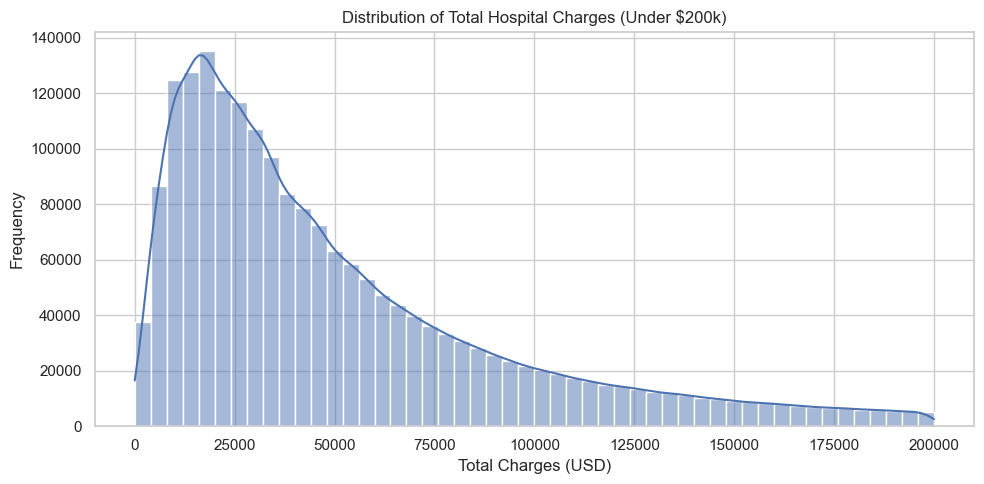

In [7]:
# Set the visual scale for the analysis
plt.figure(figsize = (10,5))

# Histogram to visualize distribution of charges below $200k for better granularity
sns.histplot(
            df["Total Charges"][df["Total Charges"] < 200000],
            bins = 50,
            kde = True
)

# Titles and labels
plt.title("Distribution of Total Hospital Charges (Under $200k)")
plt.xlabel("Total Charges (USD)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 3.2 Operational Analysis: Patient Stay Duration

* **Objective**: Visualize the distribution of **Length of Stay** to identify **"typical"** hospitalization patterns and variability.

* **Data Strategy (Filtering < 30 Days)**: We focus on stays under 30 days to mitigate the **"Long-Tail" effect**. While some patients remain hospitalized for months (outliers), over 90% of cases are acute and short-term. By filtering the data, we "zoom in" on the core population, revealing a granular view of the most frequent treatment cycles that would otherwise be compressed on a full-scale axis.

* **Key Insight**: The **KDE curve** highlights the **mode** (peak) of the distribution. Identifying whether the most common stay is 2, 3, or 5 days is critical for hospital resource allocation and bed management.

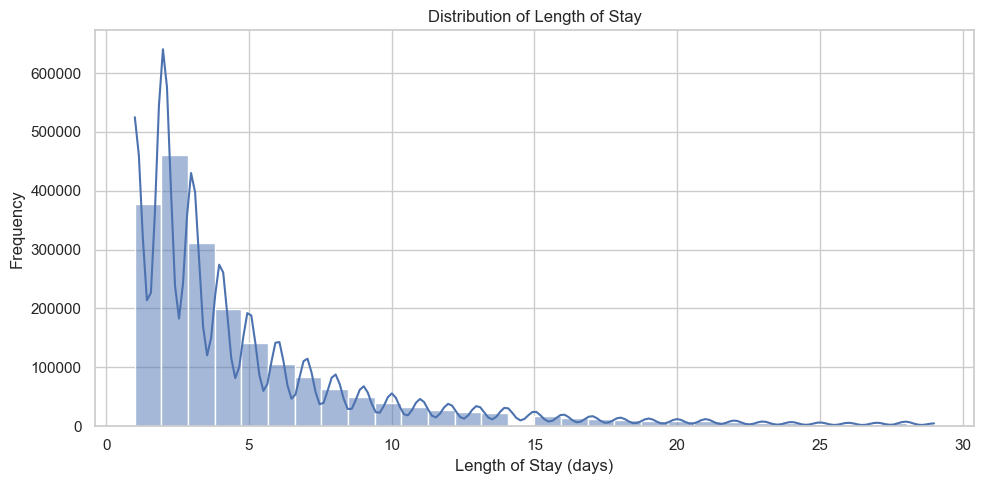

In [8]:
# Focus on typical stays (<30 days), excluding rare long-term cases
df_filtered = df[df["Length of Stay"].notna() & (df["Length of Stay"] < 30)]

plt.figure(figsize = (10,5))

# Histogram with KDE to visualize distribution and density of stays
sns.histplot(
            df_filtered["Length of Stay"],
            bins = 30,
            kde = True
)

# Titles and labels
plt.title("Distribution of Length of Stay")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* **Business insight**: Most hospital stays are short to medium in length, while long-stay patients are less common but use disproportionately more resources and require separate operational consideration.

### 3.3 Clinical Complexity & Financial Risk

* **Objective**: Visuale how clinical severity levels relate to total hospital charges and cost variability

* **Methodology**: A box plot is used to visualize the median, quartiles, and overall spread of costs across severity levels. This approach highlights not only the typical cost, but also the variability and financial dispersion within each clinical group.

* **Order of Severity**: By explicitly ordering from **Minor to Extreme**, we can observe the clear upward trend in medical resource consumption as clinical complexity increases.

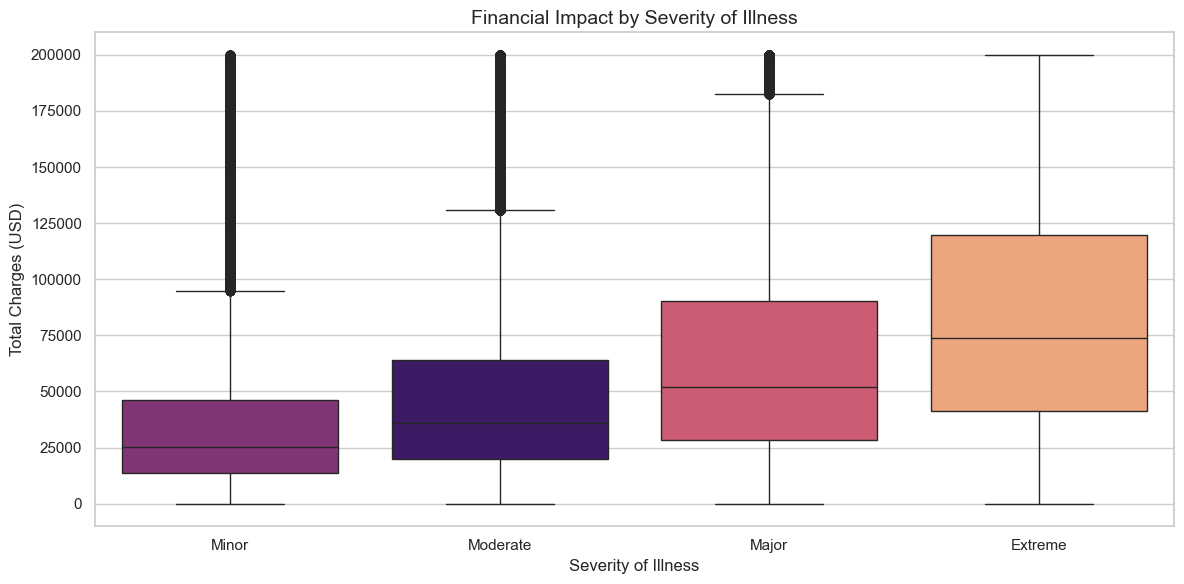

In [9]:
# --- CLINICAL COMPLEXITY & FINANCIAL RISK ---
# Define the logical clinical progression to ensure the plot follows medical reality
severity_order = ['Minor', 'Moderate', 'Major', 'Extreme']

# Filter charges < 200k to eliminate extreme outliers and improve visualization of the bulk distribution
df_filtered = df[df['Total Charges'] < 200000]

plt.figure(figsize = (12, 6))

# Box plot of Total Charges by severity
#'magma' palette to reflect increasing severity levels
sns.boxplot(
            x = 'APR Severity of Illness Description', y = 'Total Charges', 
            data = df[df['Total Charges'] < 200000], 
            order = severity_order,
            palette = 'magma',
            hue = 'APR Severity of Illness Description',
            legend = False
)

# Titles and labels
plt.title("Financial Impact by Severity of Illness", fontsize=14)
plt.xlabel("Severity of Illness")
plt.ylabel("Total Charges (USD)")

plt.tight_layout()
plt.show()

* **Business insight**: The widening whiskers in **Major** and **Extreme** categories indicate that as cases get more complex, costs become less predictable, representing higher financial risk for both the patient and the provider. Hospitals should monitor complex cases closely, as severe conditions can lead to unexpected financial outcomes.

### 3.4 Clinical Revenue Segmentation by DRG(Diagnosis Related Groups)

* **Objective**: Identify the highest-value diagnostic groups based on median Total Charges to understand which service lines generate the largest financial impact per discharge.

* **Methodology**: The median **(.median())** is used instead of the **mean** because healthcare cost data is highly skewed. A few extremely expensive cases can distort the average, while the median better reflects the typical cost within each diagnostic group. A horizontal bar chart is used to improve readability for long clinical descriptions.


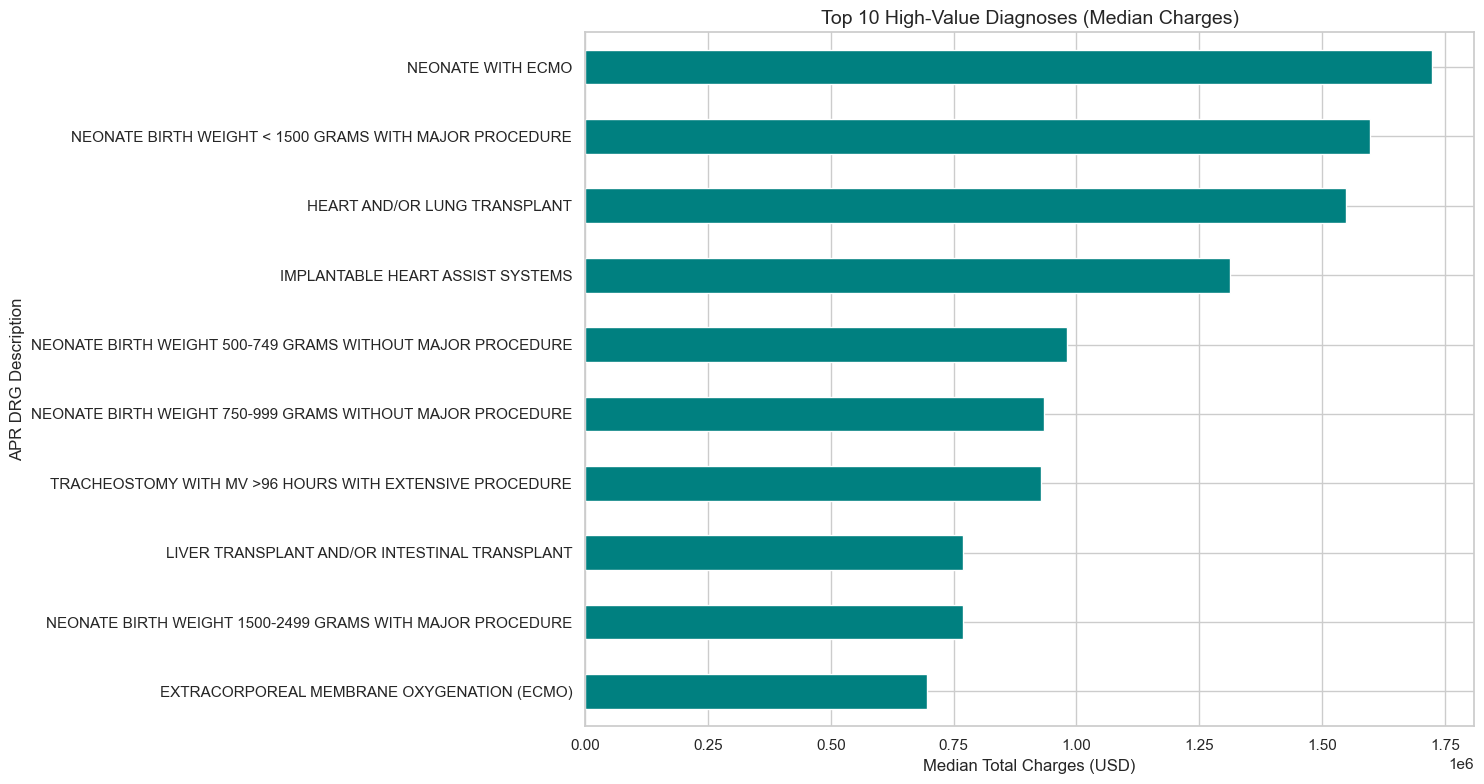

In [19]:
# --- CLINICAL REVENUE DRIVERS ---
# Identify the top 10 most expensive diagnosis groups by median charges
top_10_drg = (
            df.groupby('APR DRG Description')['Total Charges']
            .median()
            .sort_values(ascending=False)
            .head(10)
)

plt.figure(figsize=(15, 8))
top_10_drg.plot(kind = 'barh', color='teal')

# Titles and labels
plt.xlabel("Median Total Charges (USD)")
plt.title("Top 10 High-Value Diagnoses (Median Charges)", fontsize = 14)

# Display highest-value categories at the top
plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

* **Business Insight**: The diagnoses in this Top 10 list represent the hospital’s primary “Profit & Loss” drivers. High median charges in areas such as Neonatology, Cardiac Surgery, and Major Organ Transplants highlight opportunities where even **a 1% improvement in operational efficiency** —reducing supply waste or optimizing operating room turnover—can save millions. These categories are key targets for **Cost-Effectiveness Analysis** and **Resource Management** initiatives.

### 3.5 Demographic Cost Analysis: Impact of Patient Age

* **Objective**: Examine how patient age relates to hospital charges, highlighting the financial burden across different life stages.

* **Data Strategy (Categorical Ordering)**: Age groups are explicitly ordered from “0 to 17” through “70 or Older” to preserve chronological trends. This ensures the analysis reflects the natural progression of healthcare consumption by age.

* **Feature Engineering (Cost-to-Charge Ratio)**: We introduce **Cost-to-Charge Ratio (CCR)**, a key metric representing the proportion of hospital costs to billed charges. CCR serves as a proxy for operational efficiency and financial performance across age groups.

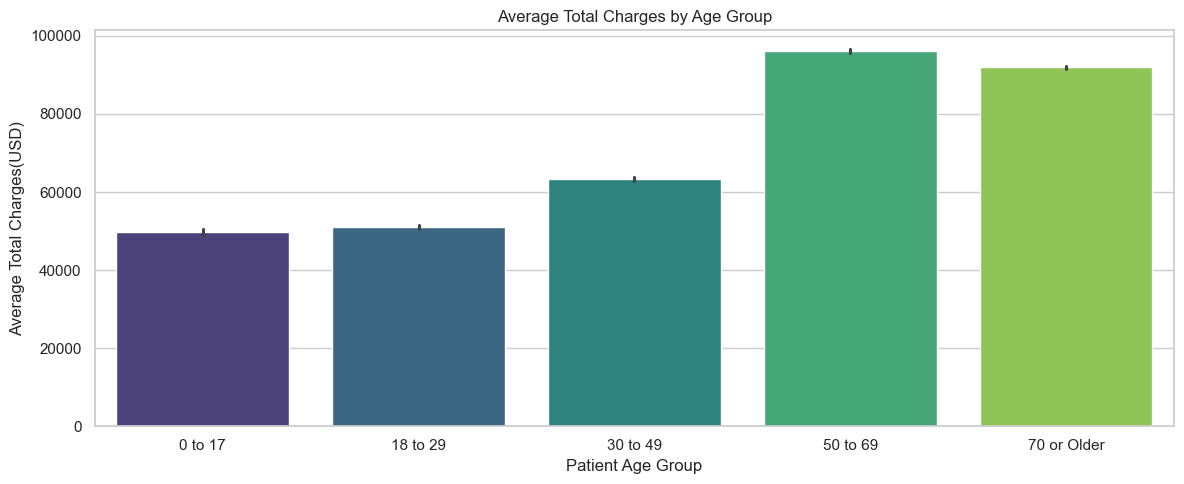

In [11]:
# --- DEMOGRAPHIC COST ANALYSIS ---
# Define logical chronological order for age groups
age_order = ["0 to 17", "18 to 29","30 to 49","50 to 69","70 or Older"]
df['Age Group'] = pd.Categorical(df['Age Group'], categories = age_order, ordered=True)

# Calculate Cost-to-Charge Ratio (CCR)
df['Cost_to_Charge_Ratio'] = df['Total Costs'] / df['Total Charges']

plt.figure(figsize = (12,5))

# Bar plot of average Total Charges by Age Group
sns.barplot(
            data=df,
            x = 'Age Group',
            y = 'Total Charges',
            palette = 'viridis',
            hue = 'Age Group',
            legend = False
)

# Titles and labels
plt.title("Average Total Charges by Age Group") 
plt.xlabel("Patient Age Group")
plt.ylabel("Average Total Charges(USD)")

plt.tight_layout()
plt.show()

* **Business Insight**: The 50-69 age group represents **a "Financial Pivot Point"**. While the 70 or Older group often has costs covered by Medicare (government), the 50-69 group frequently relies on private/employer-based insurance. High charges in this segment suggest that hospital revenue cycles are highly dependent on this demographic. Improving chronic disease management in middle-aged patients could significantly reduce high-cost inpatient "shocks" for both payers and providers.

### 3.6 Demographic Cost Analysis: Gender Impact

* **Objective**: Compare average hospital charges between genders to identify potential differences in resource use or clinical intensity.

* **Data Strategy (Comparative Analysis)**: A bar plot is used to show mean Total Charges for Male and Female patients. This high-level comparison provides a baseline to assess whether intervention costs differ by gender across New York State hospitals.

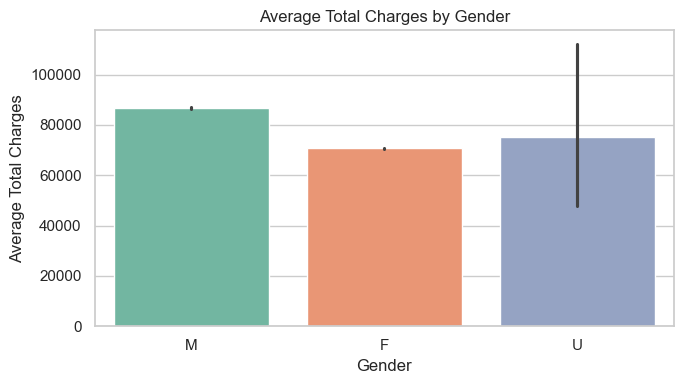

In [12]:
# --- DEMOGRAPHIC COST ANALYSIS: GENDER ---
plt.figure(figsize = (7,4))

# Bar plot of average Total Charges by Gender
sns.barplot(
            data = df,
            x = 'Gender',
            y = 'Total Charges',
            palette = 'Set2',
            hue = 'Gender',
            legend = False
)

# Titles and labels
plt.title("Average Total Charges by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Total Charges")

plt.tight_layout()
plt.show()

**Business Insight**: If a significant gap exists between Male and Female charges, it often points to different **"Clinical Mixes"**. For instance, higher average charges for Male patients are frequently associated with late-stage cardiovascular interventions or trauma cases. Conversely, Female patient data often includes a high volume of labor and delivery cases, which, while frequent, may have more standardized (and thus lower) median costs compared to complex surgeries. Hospitals can use this insight to tailor their **"Service Line"** marketing and resource planning based on the dominant demographic needs of their specific region.

### 3.7 Efficiency Analysis: Cost-to-Charge Ratio (CCR) Trends

* **Objective**: Track the financial efficiency of hospital services across different age demographics using the Cost-to-Charge Ratio (CCR).

* **Data Strategy (Trend Visualization)**: We employ a line plot to visualize the progression of CCR across age brackets. Unlike a bar chart, the line plot emphasizes the "trajectory" of efficiency, allowing us to identify at which life stage the gap between hospital costs and patient charges narrows or widens.

* **Technical Note**: A higher CCR means hospital costs are closer to total charges (lower margin), while a lower CCR reflects a wider pricing spread. Markers and gridlines help highlight potential efficiency shifts across life stages.

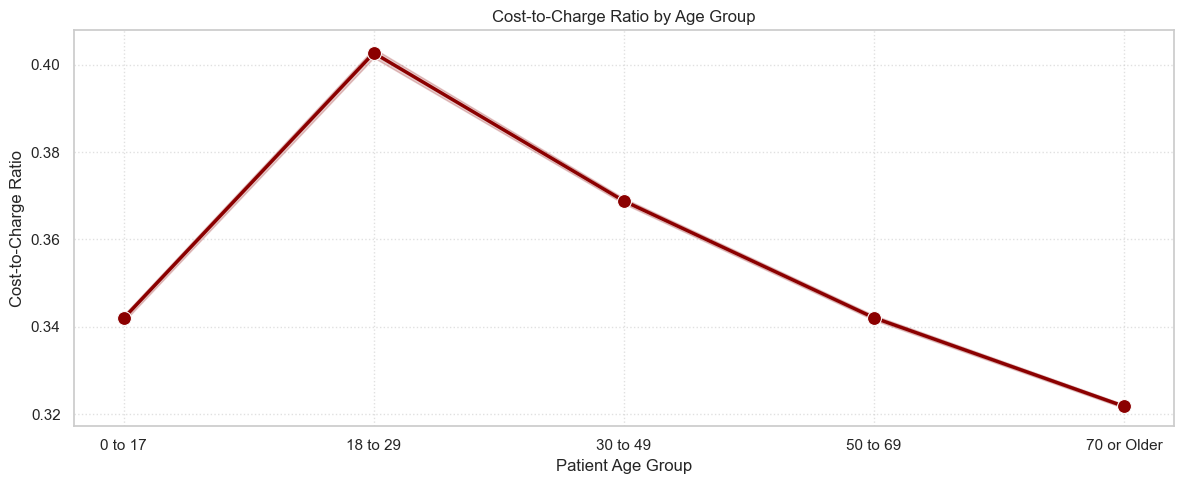

In [13]:
# --- CCR ANALYSIS BY AGE GROUP ---
plt.figure(figsize = (12, 5))

# Line plot of Cost-to-Charge Ratio (CCR) across age groups to analyze efficiency trajectory
sns.lineplot(
            data=df, 
            x = 'Age Group', 
            y = 'Cost_to_Charge_Ratio', 
            marker = 'o', 
            markersize=10, 
            color = 'darkred', 
            linewidth = 2.5
)

# Titles and labels
plt.title("Cost-to-Charge Ratio by Age Group")
plt.xlabel("Patient Age Group")
plt.ylabel("Cost-to-Charge Ratio")

# Grid for readability
plt.grid(True, linestyle = ':', alpha = 0.6)

plt.tight_layout()
plt.show()

* **Business Insight**: If the CCR increases with age, it indicates that treating older patients is not only more expensive but also **operationally less profitable**, as actual costs consume a larger portion of billed charges. This trend often reflects the complexity of geriatric care, which requires intensive but partially non-billable resources (e.g., nursing time, care coordination, social support). Hospital leadership can use this insight to renegotiate reimbursement rates or redesign senior-focused service lines to improve margin sustainability.

### 3.8 Financial & Operational Correlation Matrix

* **Objective**: Quantify the strength of relationships between key financial and operational variables: Total Charges, Total Costs, and Length of Stay.

* **Data Strategy (Multivariate Correlation)**: A Pearson correlation heatmap is used to evaluate linear relationships across core hospital performance metrics. This approach helps identify which operational drivers—such as Length of Stay — have the strongest financial impact. Annotated coefficients and the coolwarm color scale enhance interpretability for executive-level review.

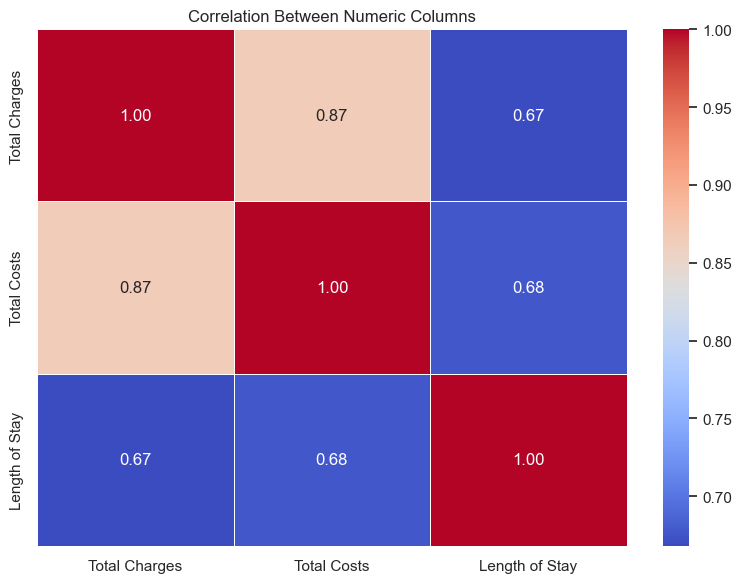

In [23]:
# --- FINANCIAL & OPERATIONAL CORRELATION ---
numeric_cols = ['Total Charges', 'Total Costs', 'Length of Stay']
correllation = df[numeric_cols].corr()

plt.figure(figsize=(8,6))

# Plot heatmap with annotations
sns.heatmap(correllation,
            annot = True, # Display correlation coefficients inside cells
            cmap = 'coolwarm',
            fmt=".2f", # Format values to 2 decimal places for executive readability
            linewidths=0.5
)

# Title
plt.title("Correlation Between Numeric Columns")


plt.tight_layout()
plt.show()

* **Business Insight**: A strong correlation between Total Charges and Total Costs is expected, as billing typically scales with underlying expenses. However, the relationship between Length of Stay and Total Costs is often the more actionable metric. If Length of Stay shows a weaker-than-expected correlation with costs, it suggests that clinical intensity—procedures, diagnostics, and specialized interventions—drives expenses more than accommodation-related factors. In such cases, hospital leadership should prioritize supply chain optimization and procedural efficiency rather than focusing solely on bed turnover to control costs.

# Phase 4: Project Conclusion & Strategic Recommendations

### Executive Summary

The comprehensive analysis of the 2022 NY State SPARCS dataset reveals that healthcare costs are driven by a complex interplay of clinical severity, aging demographics, and operational efficiency. By shifting the focus from gross charges to the Cost-to-Charge Ratio (CCR), this study identifies specific opportunities for hospital system optimization and financial risk mitigation.

## **Key Findings & Business Insights**

### 1. Clinical Complexity as a Financial Catalyst
Our analysis of APR DRG and Severity of Illness confirms that a small subset of high-acuity cases (e.g., Cardiac Surgery, Neonatology) dictates the majority of hospital revenue and risk.

**Business Insight**: Hospitals should prioritize Clinical Documentation Improvement (CDI). Ensuring that "Extreme" severity cases are accurately coded is vital for maximizing reimbursement from insurance payers, as these cases carry the highest operational variance.

---

### 2. The Aging Demographic "Efficiency Gap"
The transition in patient age groups shows a clear trend: as patients age, the Total Charges increase, but the Cost-to-Charge Ratio (CCR) often tightens.

**Business Insight**: The 50-69 and 70+ demographics are the most resource-intensive. For healthcare providers, this underscores a need for Value-Based Care models. Shifting toward preventative outpatient care for these groups can reduce the frequency of high-cost inpatient "shocks" that strain hospital resources.

---

### 3. Operational Leverage: Time vs. Intensity
The correlation analysis proved that while Length of Stay (LOS) is a significant factor, it is the Clinical Intensity within those days that truly drives the bottom line.

**Business Insight**: Managing "Bed Turnover" is no longer enough. To improve margins, administrators must focus on Supply Chain Optimization and Procedural Efficiency. Reducing the time a patient spends in high-cost areas (like the OR or ICU) is more impactful than simply reducing the total days spent in a standard hospital bed.

---

### Strategic Recommendations for Stakeholders:

* **Optimize High-Value Service Lines**: Focus on the Top 10 DRGs identified in this study to standardize clinical pathways and reduce waste.

* **Monitor CCR Trends**: Use the Cost-to-Charge Ratio as a monthly KPI to identify departments where operational costs are rising faster than billing capacity.

* **Invest in Health Equity:** Further analyze demographic disparities (e.g., Age and Gender) to ensure that resource allocation aligns with the specific needs of the local New York population.

---

## 🔹**Final Project Verdict**

This analysis confirms that NY State hospitals' financial performance is primarily driven by clinical intensity and demographic structure rather than patient volume alone. High-severity cases and aging populations significantly increase cost concentration and operational risk.

By integrating CCR into routine performance monitoring, providers can move beyond revenue reporting and toward efficiency-based financial management. This supports data-driven decision-making at both the departmental and system levels.